# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [24]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

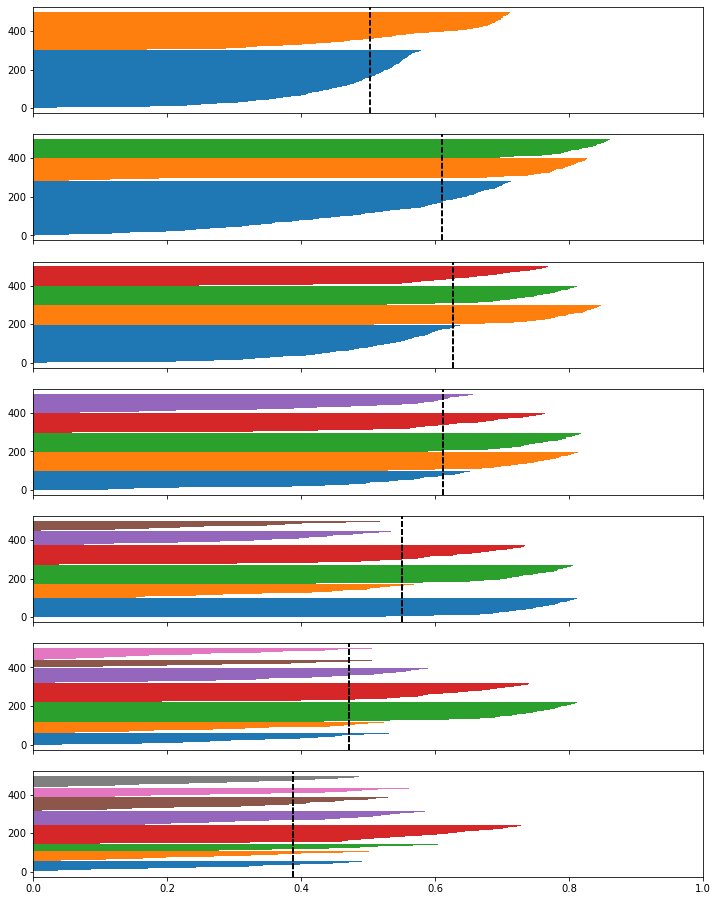

In [29]:
# 計算並繪製輪廓分析的結果
fig, ax = plt.subplots(7, 1, figsize=(12, 16), sharex=True)
for i, j in enumerate(range_n_clusters):
    labels = KMeans(n_clusters=j).fit_predict(X)
    scores = silhouette_samples(X, labels)
    y_lwr, y_upr = 0, 0
    yticks = list()
    for k in range(j):
        sil = sorted(scores[labels == k])
        y_upr += len(sil)
        ax[i].barh(range(y_lwr, y_upr), sil, height=1.0)
        yticks.append((y_lwr + y_upr)/2)
        y_lwr += len(sil)
        ax[i].axvline(np.mean(scores), color='k', linestyle='--')
plt.xlim(0, 1)
plt.show()